In [1]:
# LOAD PACKAGES 
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
opj = os.path.join
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# For prfpy 
from prfpy_csenf.stimulus import *
from prfpy_csenf.model import Iso2DGaussianModel,Norm_Iso2DGaussianModel, CSS_Iso2DGaussianModel,DoG_Iso2DGaussianModel
# For dag_prf_utils
from dag_prf_utils.prfpy_functions import Prf1T1M, PrfMulti 
from dag_prf_utils.prfpy_ts_plotter import TSPlotter
from dag_prf_utils.plot_functions import * 
# SCOTOMA PROJECT 
from scot_habrok.load_saved_info import *

# Fix seed (just in case doing anything random)
np.random.seed(0)


Could not find path for freeview, is freesurfer accessible from here?
Could not find FS_LICENSE, set using os.environ above
Error importing pycortex... Not a problem unless you want to use pycortex stuff
SUBJECTS_DIR not found in os.environ
Adding empty string...


In [2]:
# Save the notebook outputs 
# SAVE NOTEBOOK + FIGURES
from figure_finder.figure_saver import FigureSaver
from figure_finder.utils import save_running_code

nb_output = '/scratch/p307263/pilot1/derivatives/notebook_timeline'
if not os.path.exists(nb_output):
    os.makedirs(nb_output)

fig_saver = FigureSaver(
    name='scot_MAIN-2024-08-02',
    path=nb_output,
    fig_overwrite='ow',   
    save_mode       = True, 
    save_svg        = True,
    save_svg_w_code = False,
    save_png        = True,
    save_pdf        = True,
    folder_ow       = True,
)
# save_running_code(fig_saver.path)
as_cols = {
    'AS0'   : '#000000',
    'AS1'   : '#d95f02',
    'AS2'   : '#7570b3',
}

# Load subjects - sped up by multiprocessing
ecc_bins = np.linspace(0,5,6)
# More IP plotting functions


FOLDER ALREADY EXISTS!
Deleting and remaking folder


In [16]:
task_list = ['AS0', 'AS1', 'AS2']
model_list = ['gauss' , 'css'] # , 'norm']
sub_list = ['sub-01', 'sub-02', 'sub-03', 'sub-04',  'sub-05', 'sub-06', 'sub-07'] 
look_in = 'prf_HRFfit_NM_dt5'
roi_fit = 'all'
mod_cols = {
    'gauss' : '#3CA969',
    'norm' :  '#8557A7',
    'css' :  '#8557A7',    
}
roi_list = ['all', 'v1custom', 'v2custom', 'v3custom', 'v3abcustom', 'v4custom', 'LOcustom', 'TOcustom', 'IPScustom']
# SIMPLIFIED VERSION:
upsampling_factor = 1.7**2 / 0.7**2
print(f'Upsampling factor: {upsampling_factor}')



Upsampling factor: 5.8979591836734695


In [17]:
scotoma_info = get_scotoma_info()
dm_npy = get_design_matrix_npy(['AS0', 'AS1', 'AS2'])
fit_settings = load_yml_settings(hrf_version='new', sub=None)
prfpy_stim = {}
prfpy_mod = {'gauss':{}, 'norm':{}, 'css':{}, 'dog':{}}
cut_vols = 5
for stim in dm_npy.keys():
    prfpy_stim[stim] = PRFStimulus2D(
        screen_size_cm=fit_settings['screen_size_cm'],
        screen_distance_cm=fit_settings['screen_distance_cm'],
        design_matrix=dm_npy[stim][:,:,cut_vols:], 
        axis=0,
        TR=fit_settings['TR']
        )
    prfpy_mod['gauss'][stim] = Iso2DGaussianModel(prfpy_stim[stim])
    prfpy_mod['norm'][stim] = Norm_Iso2DGaussianModel(prfpy_stim[stim])
    prfpy_mod['css'][stim] = CSS_Iso2DGaussianModel(prfpy_stim[stim])
    prfpy_mod['dog'][stim] = DoG_Iso2DGaussianModel(prfpy_stim[stim])



In [5]:
def simplify_prf_names(prf_name):
    prf_out = prf_name.replace('gauss', 'G')
    prf_out = prf_out.replace('norm', 'N')
    prf_out = prf_out.replace('css', 'C')
    prf_out = prf_out.replace('dog', 'D')
    return prf_out


# Load the relevant stuff

In [22]:
fit_version = 'full'
prf_obj = {}
for sub in sub_list:
    real_tc = load_data_tc(
        sub=sub, 
        task_list=task_list, 
        look_in=look_in,
        )        
    try:
        prf_pars = load_data_prf(
            sub=sub,
            task_list=task_list,
            look_in=look_in, 
            model_list=model_list,
            roi_fit=roi_fit,
            include=['optimal'], 
            exclude='batch', 
            )
    except:
        print('bloop')
        continue
    prf_obj_list = []
    prf_obj_id = []
    for iT,task in enumerate(task_list):    
        for model in model_list:
            prf_obj_list.append(TSPlotter(
                prf_params = prf_pars[task][model],
                model=model,
                prfpy_model=prfpy_mod[model][task],))
            prf_obj_id.append(f'{model[0]}_{task}')
    prf_obj[sub] = PrfMulti(prf_obj_list, prf_obj_id)


/scratch/p307263/pilot1/derivatives/prf_HRFfit_NM_dt5/sub-01/ses-1/sub-01_model-gauss_roi-all_hrf-optimal_task-AS0-fits_COLLATED_stage-iter_constr-nelder_desc-prf_params.pkl
/scratch/p307263/pilot1/derivatives/prf_HRFfit_NM_dt5/sub-01/ses-1/sub-01_model-css_roi-all_hrf-optimal_task-AS0-fits_COLLATED_stage-iter_constr-nelder_desc-prf_params.pkl
/scratch/p307263/pilot1/derivatives/prf_HRFfit_NM_dt5/sub-01/ses-1/sub-01_model-gauss_roi-all_hrf-optimal_task-AS1-fits_COLLATED_stage-iter_constr-nelder_desc-prf_params.pkl
/scratch/p307263/pilot1/derivatives/prf_HRFfit_NM_dt5/sub-01/ses-1/sub-01_model-css_roi-all_hrf-optimal_task-AS1-fits_COLLATED_stage-iter_constr-nelder_desc-prf_params.pkl
/scratch/p307263/pilot1/derivatives/prf_HRFfit_NM_dt5/sub-01/ses-1/sub-01_model-gauss_roi-all_hrf-optimal_task-AS2-fits_COLLATED_stage-iter_constr-nelder_desc-prf_params.pkl
/scratch/p307263/pilot1/derivatives/prf_HRFfit_NM_dt5/sub-01/ses-1/sub-01_model-css_roi-all_hrf-optimal_task-AS2-fits_COLLATED_stage-i

In [19]:
def add2scot(prf_multi):
    # Add distance to scotoma
    for prf_id in prf_multi.id_list:
        for task in ['AS1', 'AS2']:
            this_x = prf_multi.prf_obj[prf_id].pd_params['x'].copy()
            this_y = prf_multi.prf_obj[prf_id].pd_params['y'].copy()
            scot_coord = scotoma_info[task]['scotoma_centre']
            d2s = np.sqrt((this_x-scot_coord[0])**2 + (this_y-scot_coord[1])**2)
            prf_multi.prf_obj[prf_id].pd_params[f'd2s_{task}'] = d2s.copy()
            prf_multi.pd_params[f'{prf_id}-d2s_{task}'] = d2s.copy()
            # Also in terms of prf size 
            this_sigma = prf_multi.prf_obj[prf_id].pd_params['size_1'].copy()
            d2s_sigma = d2s / this_sigma
            prf_multi.prf_obj[prf_id].pd_params[f'd2s_s1_{task}'] = d2s_sigma.copy()
            prf_multi.pd_params[f'{prf_id}-d2s_s1_{task}'] = d2s.copy()
    return prf_multi

for sub in sub_list:
    try:
        prf_obj[sub] = add2scot(prf_obj[sub])
    except:
        continue


In [23]:
prf_obj[sub].id_list

['g_AS0', 'c_AS0', 'g_AS1', 'c_AS1', 'g_AS2', 'c_AS2']

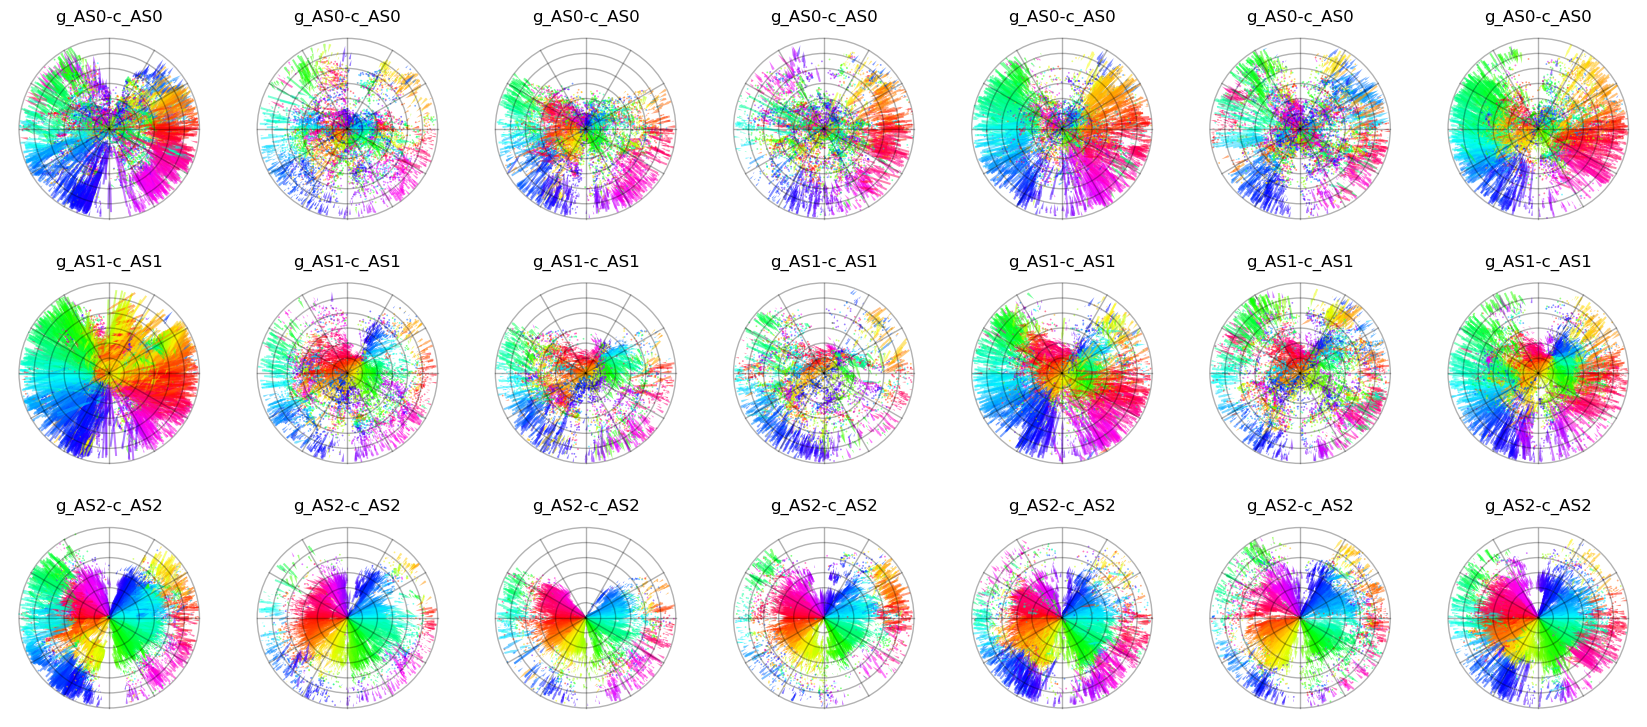

In [24]:
fig,ax = plt.subplots(3,7, figsize=(7*3,3*3))
for iS,sub in enumerate(sub_list):
    # p_list = [f'{id}-rsq' for id in prf_obj[sub].id_list]    
    # prf_obj[sub].multi_scatter(p_list)
    # plt.figure()
    # prf_obj[sub].scatter(f'g_AS0-rsq', 'c_AS0-rsq', min_rsq=0.3)
    for iT,task in enumerate(task_list):
        prf_obj[sub].arrow(
            f'g_{task}', f'c_{task}', arrow_col='angle', ax=ax[iT, iS], 
            min_rsq=0.3, 
        )
    

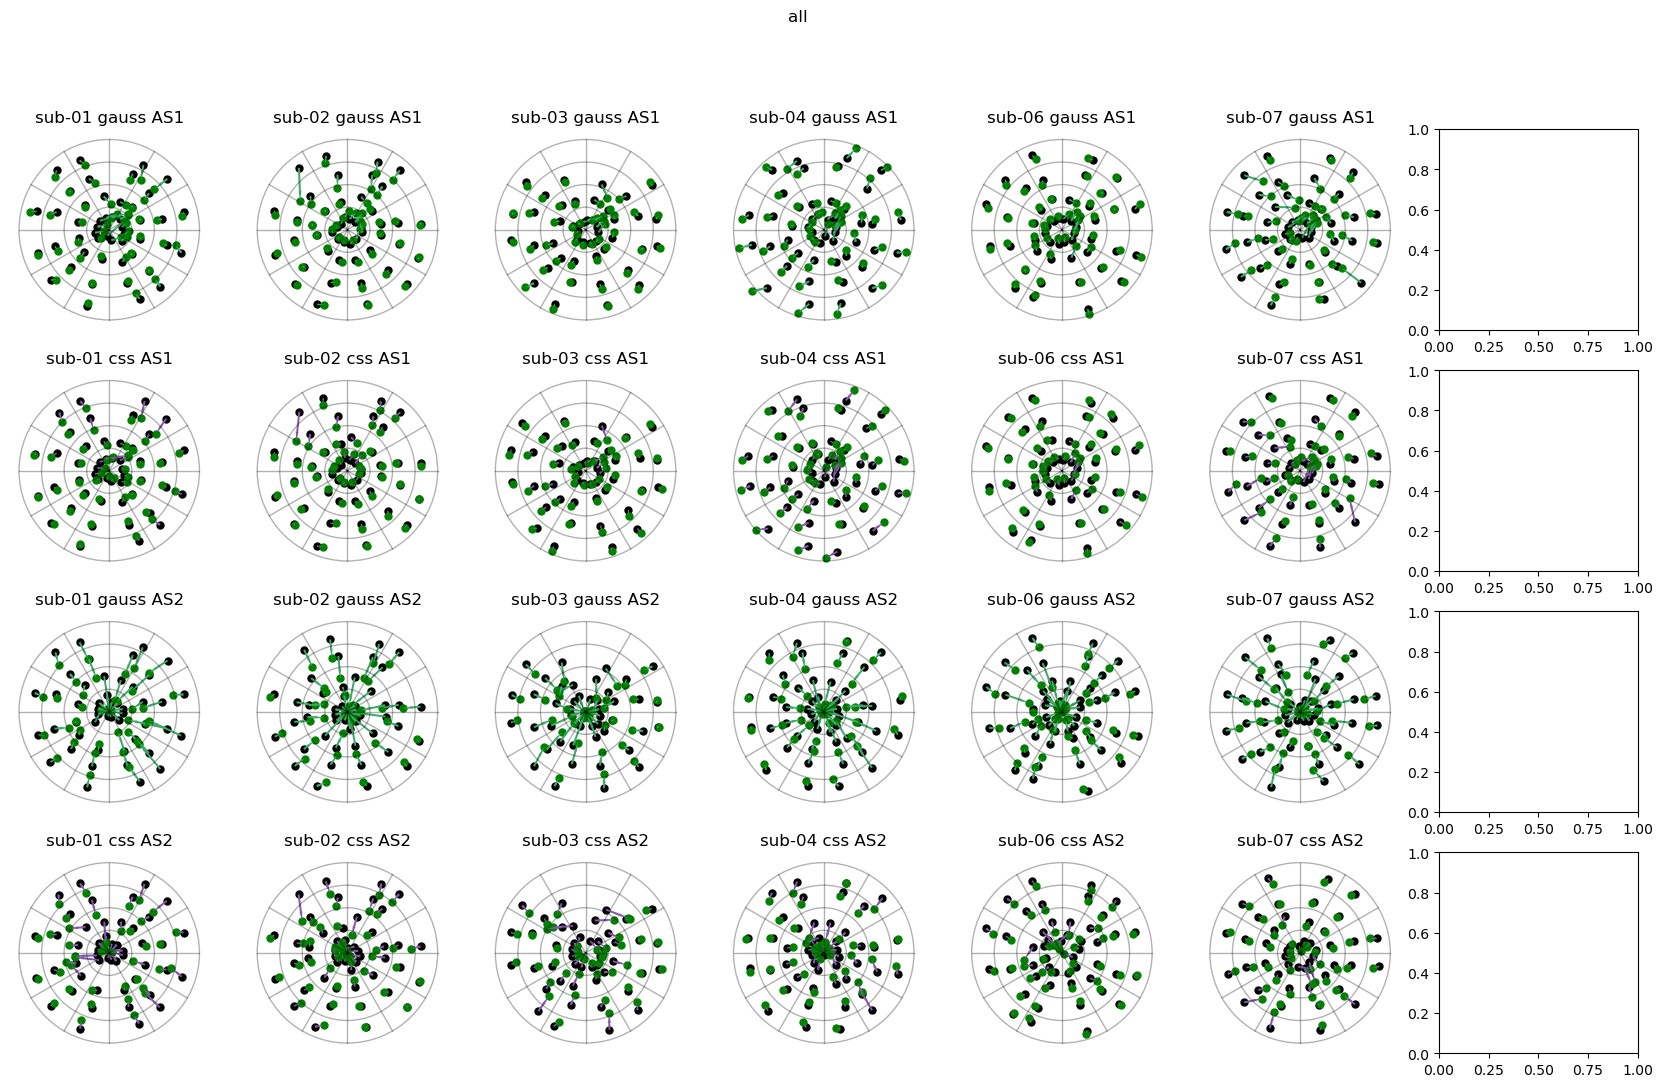

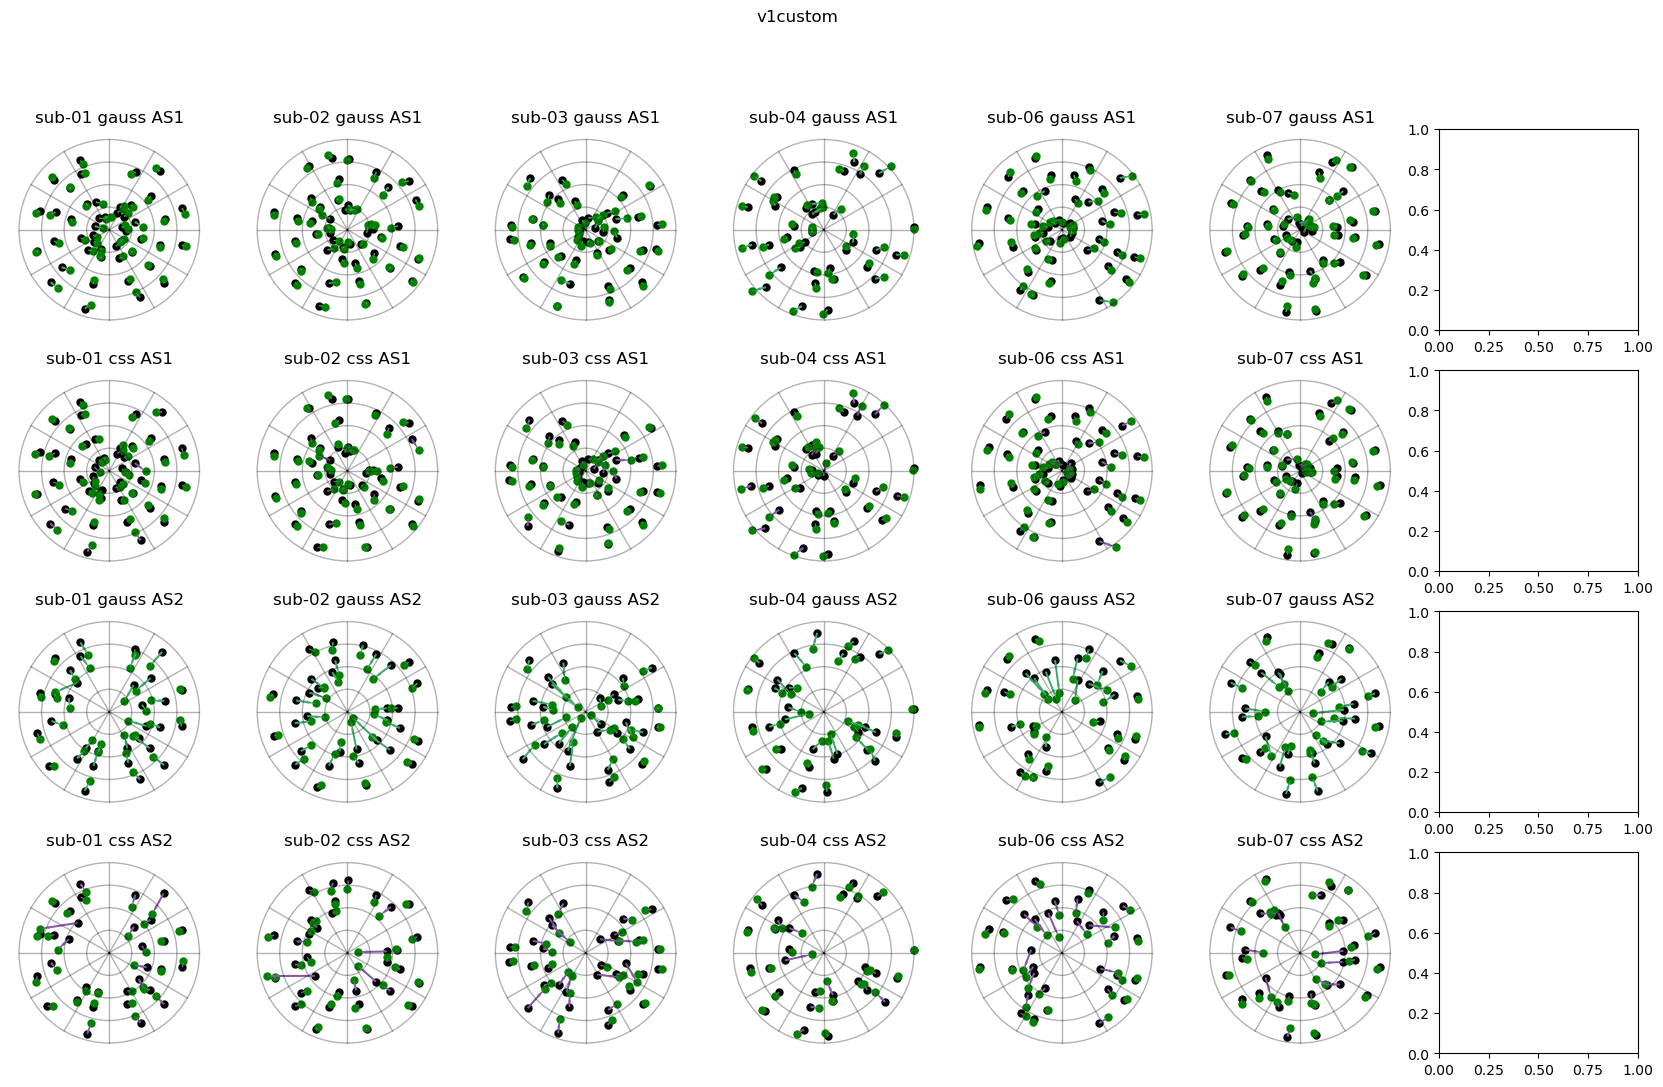

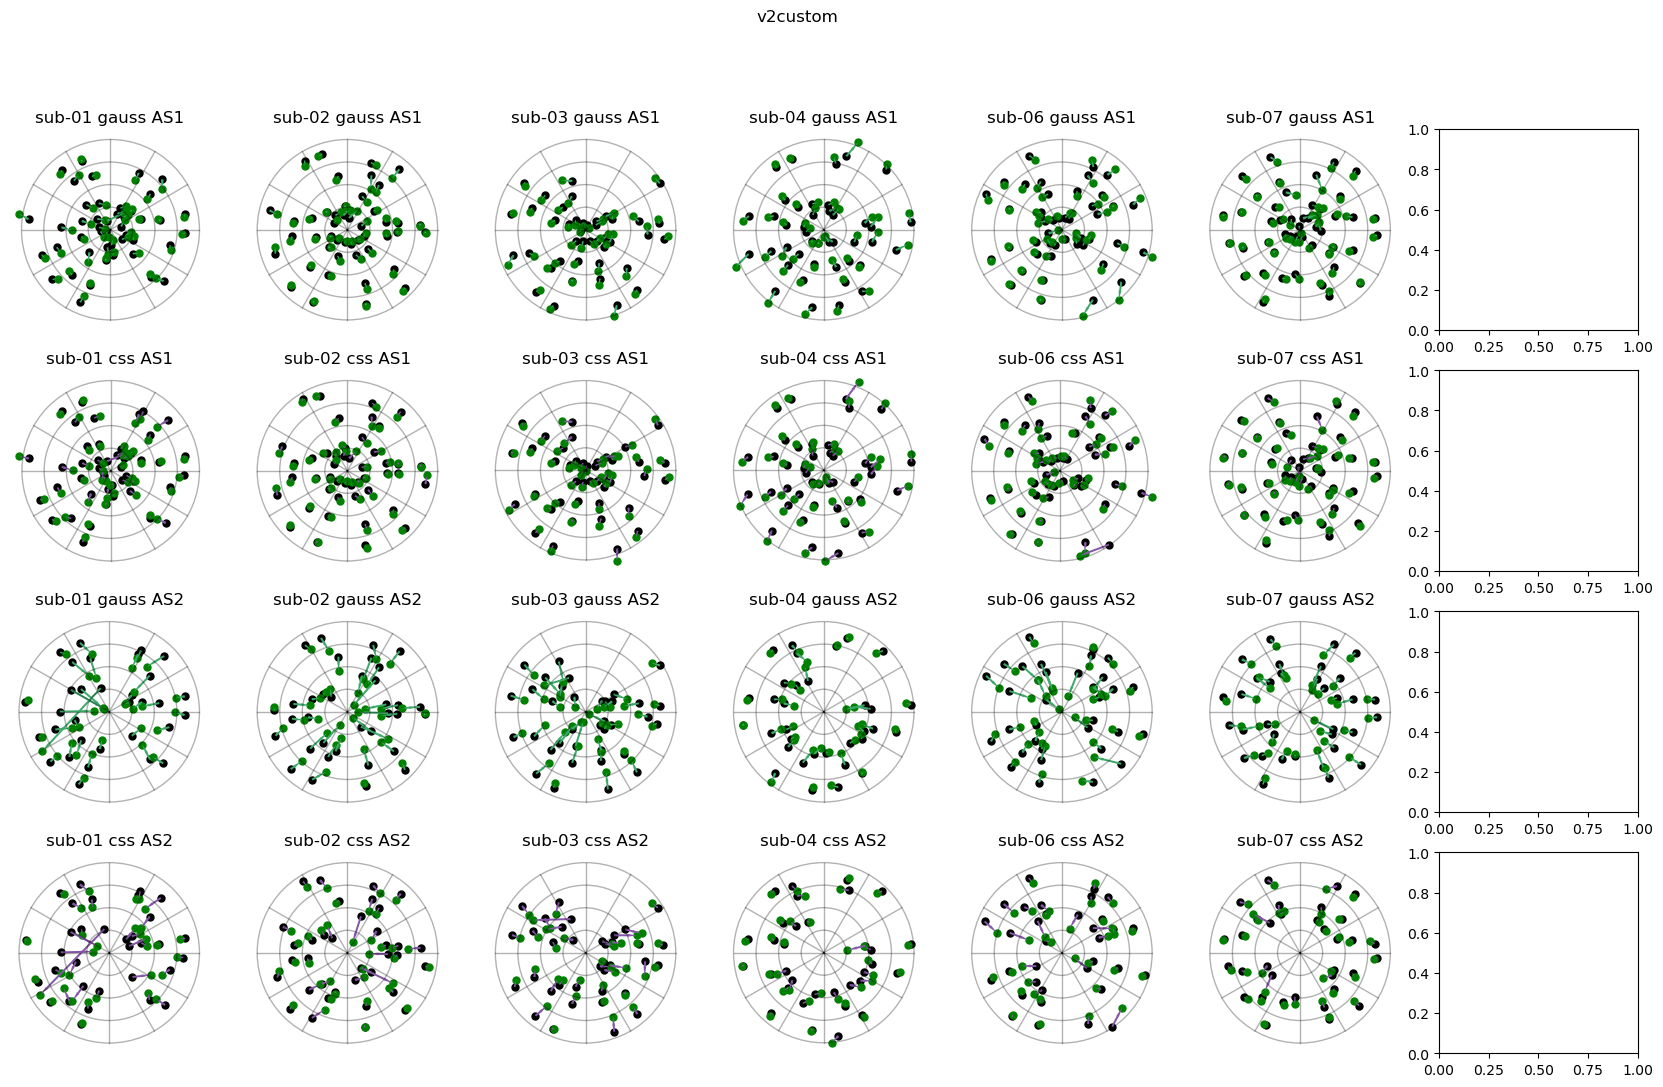

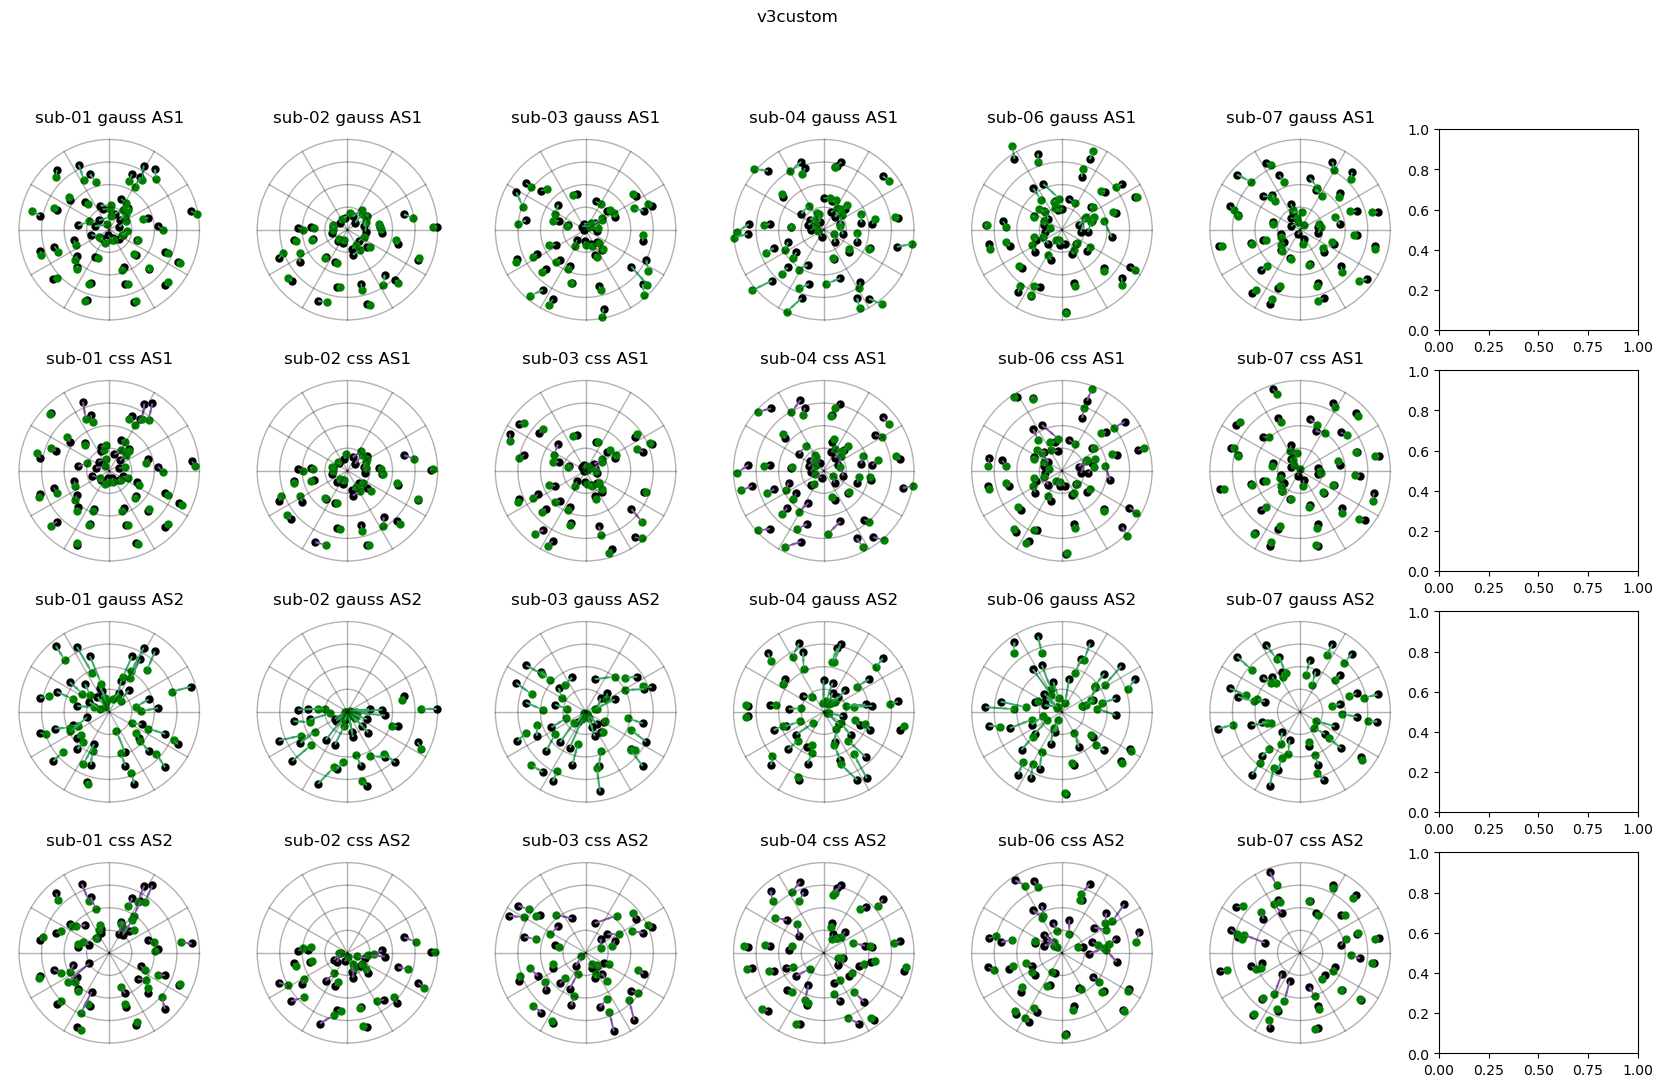

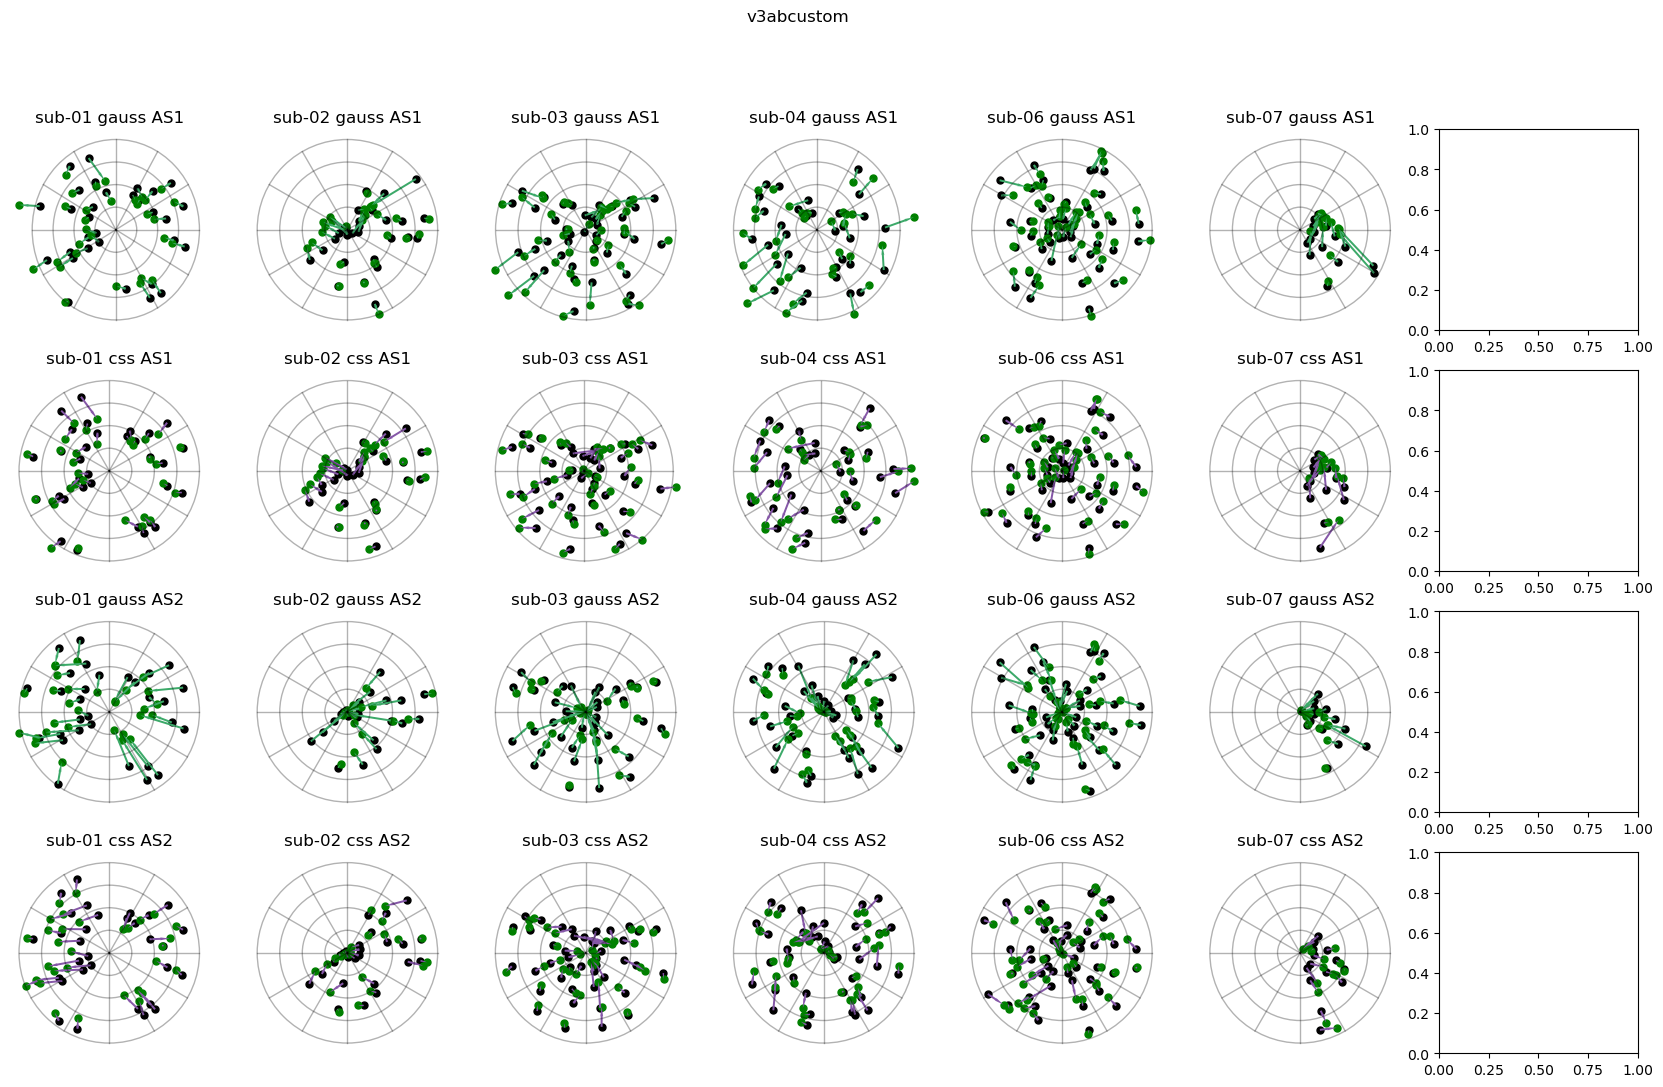

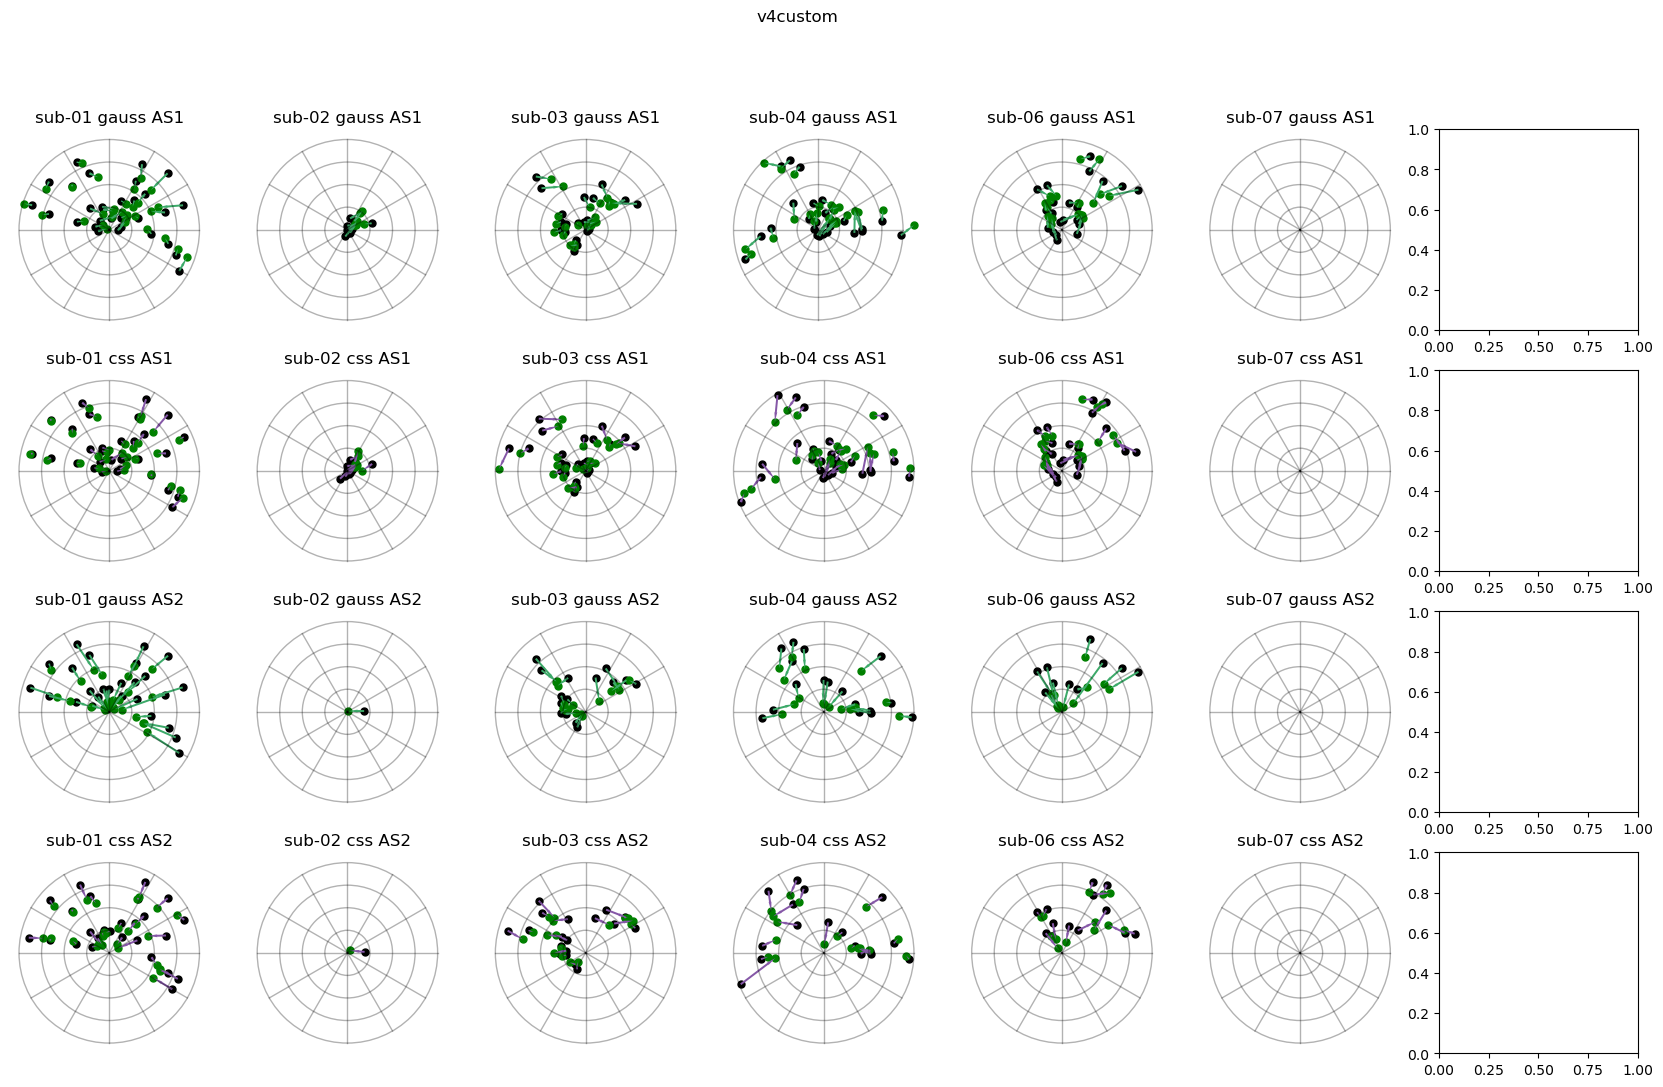

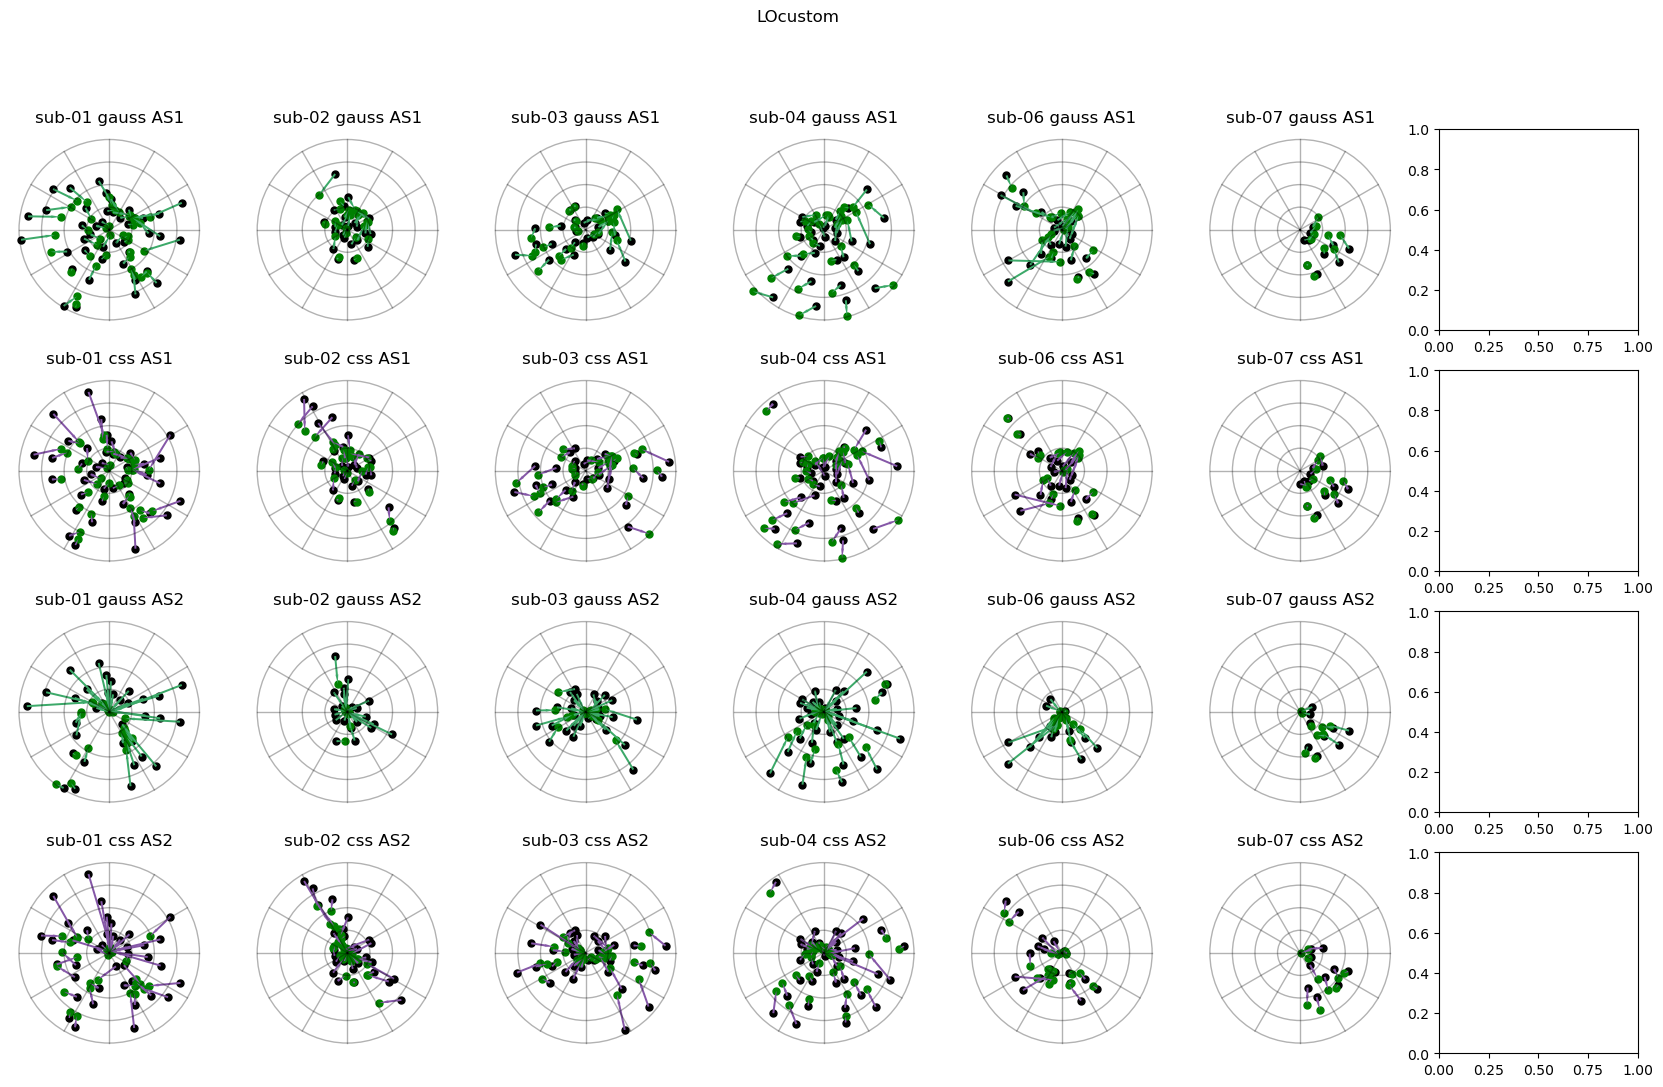

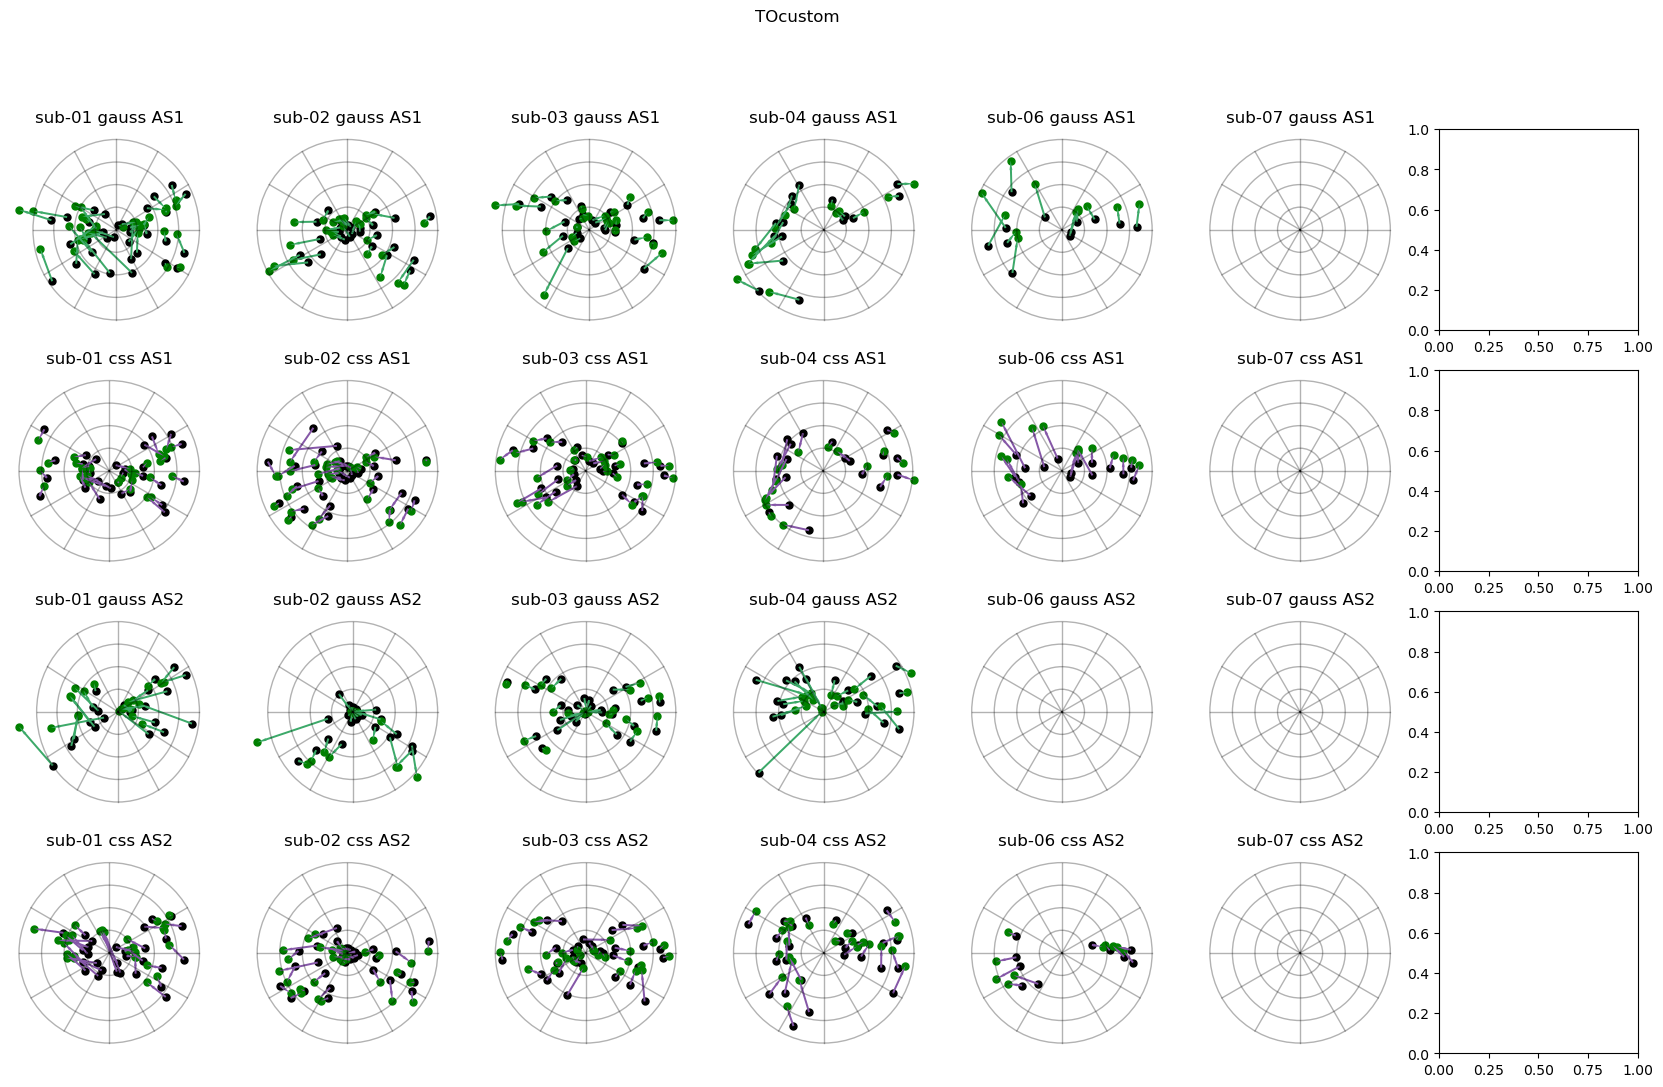

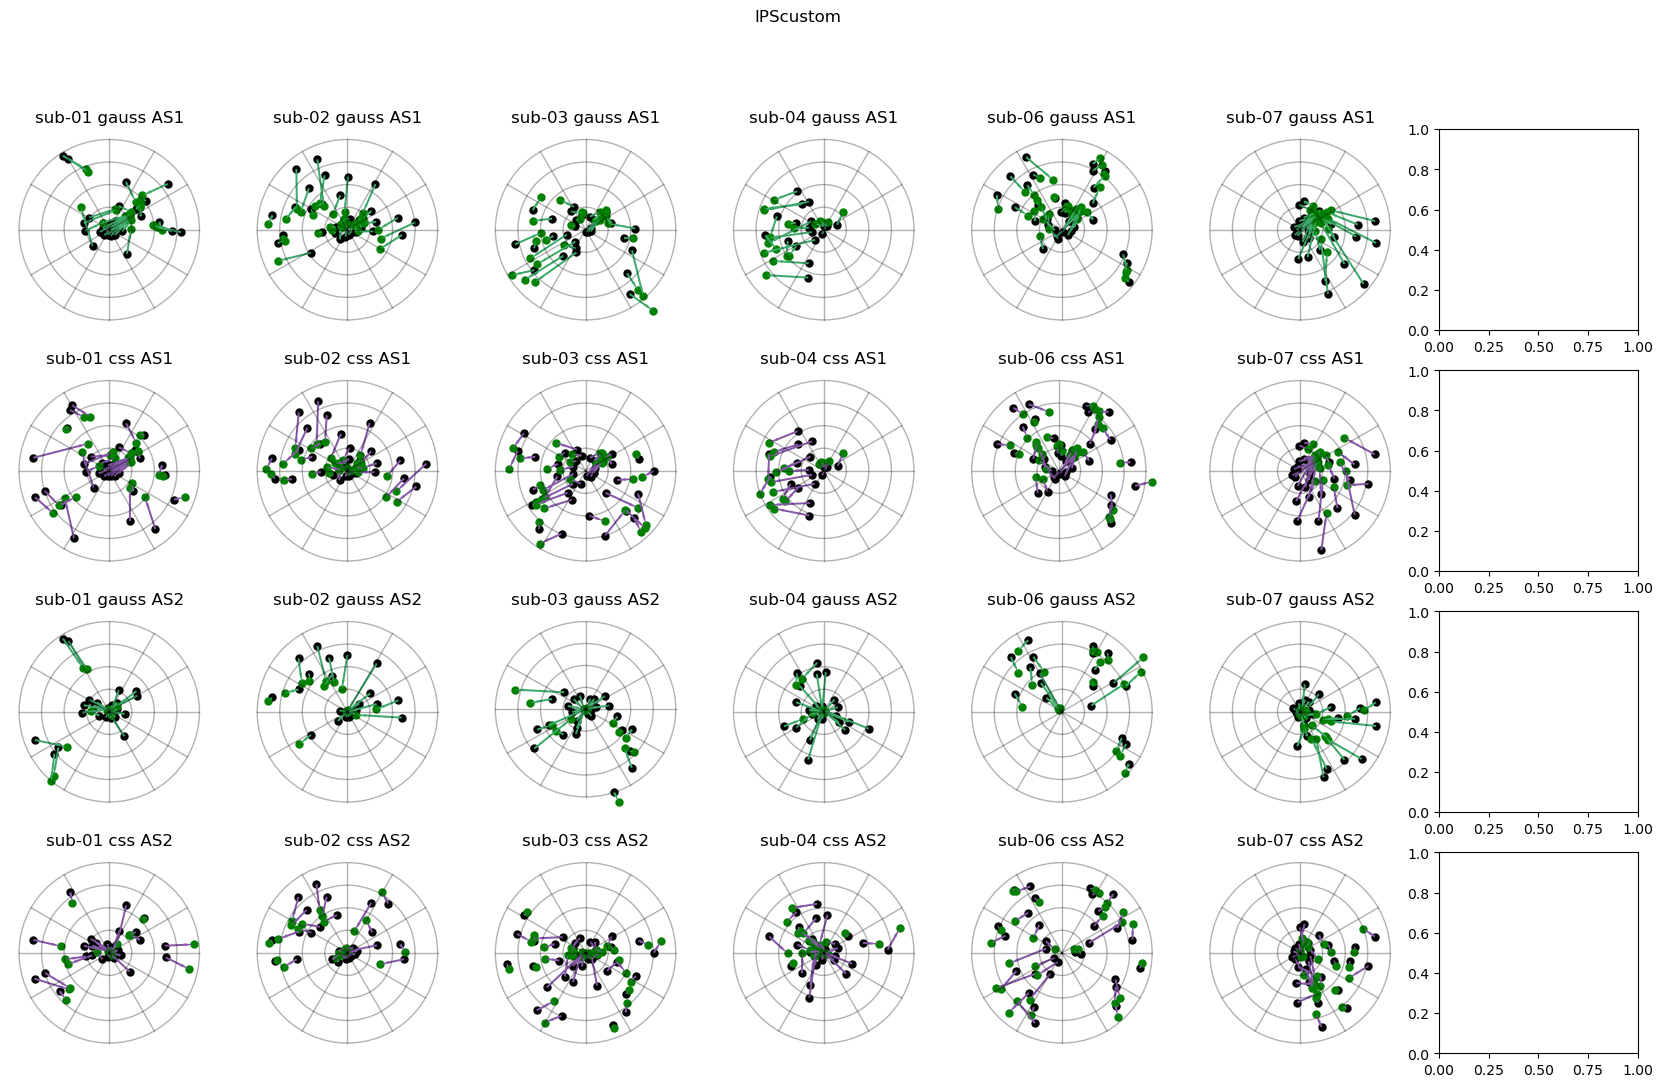

In [79]:
task1 = 'AS0'
option = 'arrow_only'
scat_options =dict(
        do_scatter= True,
        do_arrows = True,        
    )
arrow_bin_kwargs = dict(
    do_binning=True, 
    ecc_bounds = np.linspace(0, 4, 5),
    # ecc_bounds=full_ecc_bounds, #[2:4],
    # pol_bounds=full_pol_bounds, #[5:7],
    min_vx_per_bin=min_vx, 
    # add_grid_lines=False, 
)
for roi in roi_list:
    
    fig,ax = plt.subplots(4,7, figsize=(7*3,4*3))
    fig.suptitle(roi)    
    for iS,sub in enumerate(sub_list):    
        roi_mask = load_roi(sub, roi, combine_matches=True)        
        # p_list = [f'{id}-rsq' for id in prf_obj[sub].id_list]    
        # prf_obj[sub].multi_scatter(p_list)
        # plt.figure()
        # prf_obj[sub].scatter(f'g_AS0-rsq', 'c_AS0-rsq', min_rsq=0.3)
        iax = 0
        for iT,task2 in enumerate(task_list[1::]):
            for model in model_list:
                prf_obj[sub].arrow(
                    f'{model[0]}_{task1}', 
                    f'{model[0]}_{task2}', 
                    ax=ax[iax, iS], 
                    th={
                        f'{model[0]}_{task1}-min-rsq':.3, 
                        f'{model[0]}_{task1}-max-ecc': 5, 
                        f'{model[0]}_{task2}-min-rsq':.3, 
                        f'{model[0]}_{task2}-max-ecc': 5,                         
                        'roi' : roi_mask,
                        },
                    dot_size=25,
                    # old_col = 'k',
                    # new_col = 'r',
                    dot_alpha=1,
                    arrow_col=mod_cols[model],
                    **scat_options,
                    **arrow_bin_kwargs
                    )
                # print(f'{sub} {model} {task2}')
                ax[iax, iS].set_title(f'{sub} {model} {task2}')
                iax += 1
        # bloop
                
            

# Paired bar plot

In [7]:
from dag_prf_utils.stats import dag_paired_ttest
def PAIRED_df(prf_obj, roi_list, p1diff, p2diff, diff_ids,  **kwargs):
    # HOW THRESH...
    # only_close_to_scot = kwargs.get('only_close_to_scot', False)
    min_rsq = kwargs.get('min_rsq', 0.1)
    max_ecc = kwargs.get('max_ecc', 5)
    min_vx = kwargs.get('min_vx', 50)

    sub_list = list(prf_obj.keys())
    nice_roi_list = [i.split('custom')[0] for i in roi_list]

    # Create threshold dictionary    
    th = {}
    for th_key in [*p1diff, *p2diff]:
        th[f'{th_key}-min-rsq'] = min_rsq
        th[f'{th_key}-max-ecc'] = max_ecc    
    # if only_close_to_scot:
    #     th[f'AS0_gauss-min-d2s_{only_close_to_scot}'] = scotoma_info[f'task-{only_close_to_scot}']['scotoma_radius'] + 1
    
    # Difference
    diff_dict = {
        'sub' : [],
        'roi' : [],
        'condition' : [],
        'shift' : [],
    }
    for iS,sub in enumerate(sub_list):
        vx_mask  = prf_obj[sub].return_vx_mask(th)
        for iR, roi in enumerate(roi_list):
            nice_roi = nice_roi_list[iR]
            vx_mask  = prf_obj[sub].return_vx_mask(th)
            vx_mask &= load_roi(sub, roi, combine_matches=True) # ALL                 
            if vx_mask.sum()<min_vx:
                # print(f'failed to get {roi} for {sub}')        
                continue

            shift1 = np.median(prf_obj[sub].return_diff_params(
                p1diff[0], p1diff[1], 'shift_mag')['shift_mag'][vx_mask].to_numpy())
            shift2 = np.median(prf_obj[sub].return_diff_params(
                p2diff[0], p2diff[1], 'shift_mag')['shift_mag'][vx_mask].to_numpy())
            # shift 1
            diff_dict['sub'].append(sub)
            diff_dict['roi'].append(nice_roi)
            diff_dict['condition'].append(diff_ids[0])
            diff_dict['shift'].append(shift1)
            # shift 2
            diff_dict['sub'].append(sub)
            diff_dict['roi'].append(nice_roi)
            diff_dict['condition'].append(diff_ids[1])
            diff_dict['shift'].append(shift2)
            
    df = pd.DataFrame(diff_dict)
    return df


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def paired_bar_plot(df, fig, ax, m1, m2):

    # Calculate medians
    rois = df['roi'].unique()
    roi_medians = {m1:[], m2:[]}
    for condition in [m1, m2]:
        for roi in rois:
            roi_data = df[(df['roi'] == roi) & (df['condition'] == condition)]['shift']
            roi_medians[condition].append(roi_data.mean())

    # Set up the plot
    # fig, ax = plt.subplots(figsize=(14, 8))

    # Plotting the median bars
    width = 0.35
    bar_positions = np.arange(len(rois))

    for i, condition in enumerate([m1,m2]):
        bar_offset = width * i
        ax.bar(bar_positions + bar_offset, roi_medians[condition], width=width, label=condition, color=mod_cols[condition])

    # Plotting the individual participant lines
    participants = df['sub'].unique()
    sub_cols = plt.cm.tab20(np.linspace(0, 1, len(participants)))
    for iS,participant in enumerate(participants):
        for iR,roi in enumerate(rois):
            m1_value = df[(df['sub'] == participant) & (df['roi'] == roi) & (df['condition'] == m1)]['shift'] #.values[0]
            m2_value = df[(df['sub'] == participant) & (df['roi'] == roi) & (df['condition'] == m2)]['shift'] # .values[0]
            
            if len(m1_value) == 0:
                m1_value = np.NaN
            else:
                m1_value = m1_value.values[0]
            if len(m2_value) == 0:
                m2_value = np.NaN
            else:
                m2_value = m2_value.values[0]
            x_values = [bar_positions[iR] , bar_positions[iR] + width]            
            y_values = [m1_value, m2_value]
            ax.plot(x_values, y_values, 
                    color='grey', # sub_cols[iS], # 'grey', 
                    alpha=0.5, marker='o',
                    # label=participant if iR == 0 else None
                    )

            # ax.plot([day - 1 + width/2, day - 1 + 1.5 * width], [fun_value, not_fun_value], color='grey', alpha=0.5, marker='o')
            # ax.plot(day - 1 + width/2, fun_value, 'o', color='red')
            # ax.plot(day - 1 + 1.5 * width, not_fun_value, 'o', color='blue')

    # Customize plot
    ax.set_xticks(bar_positions + width / 2)
    ax.set_xticklabels(nice_roi_list)
    ax.set_ylim([0, 3])
    ax.set_xlabel('ROI')
    ax.set_ylabel('Shift magnitude (degrees)')
    ax.set_title('')
    ax.legend(title='Model')

    # plt.show()
    return fig,ax


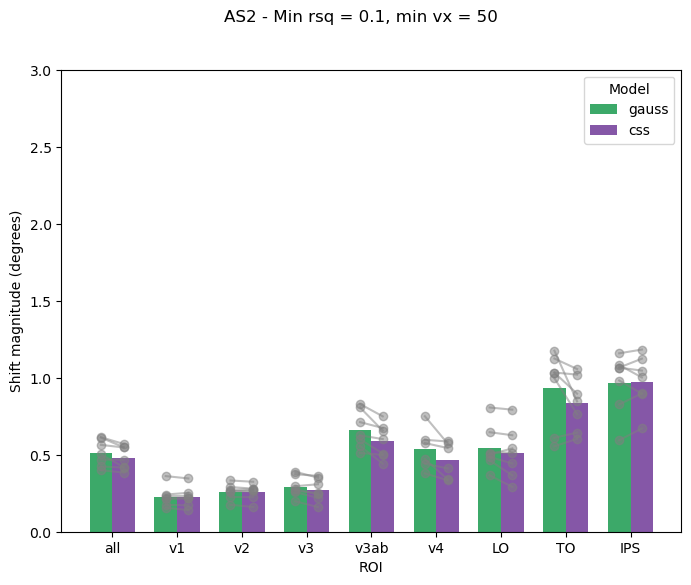

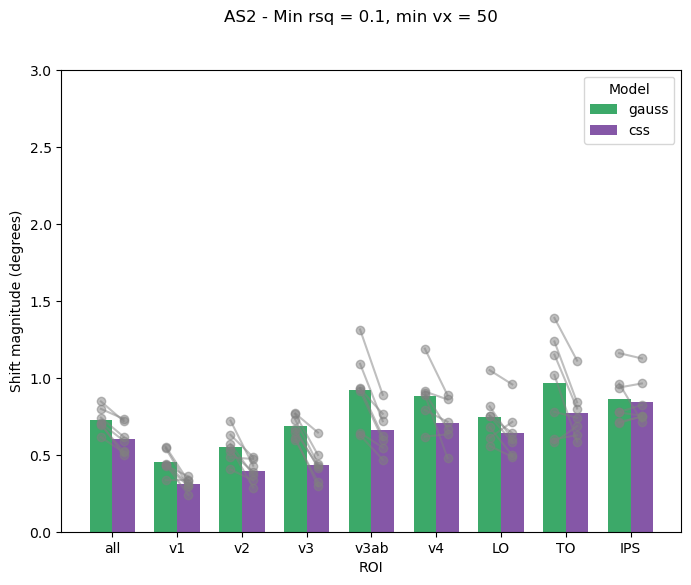

In [25]:
%matplotlib inline
task1 = 'AS0'
m1 = 'g'
m2 = 'c'
min_rsq = 0.1
min_vx = 50
max_ecc = 5
nice_roi_list = [i.split('custom')[0] for i in roi_list]
# fig,axs = plt.subplots(2,1, figsize=(12,8))
# fig.suptitle(f'Min rsq = {min_rsq}, min vx = {min_vx}')
for iT,task2 in enumerate(['AS1', 'AS2']):
    fig, ax = plt.subplots(figsize=(8,6))
    df = PAIRED_df(
        prf_obj=prf_obj,
        roi_list=roi_list,
        min_rsq=min_rsq,
        max_ecc=max_ecc,
        min_vx = min_vx,
        p1diff=[f'{m1}_{task1}',    f'{m1}_{task2}'],
        p2diff=[f'{m2}_{task1}',    f'{m2}_{task2}'],
        diff_ids = ['gauss', 'css'],
    )
    fig.suptitle(f'{task} - Min rsq = {min_rsq}, min vx = {min_vx}')
    fig, ax = paired_bar_plot(df, fig=fig, ax=ax, m1='gauss', m2='css')
    # fig_saver.add_img(
    #     fig, f'paired_bar_plot_{task}',
    # )    

In [60]:
df

sub  roi condition     shift
0   sub-01  all         G  0.702201
1   sub-01  all         C  0.424562
2   sub-01   v1         G  0.525368
3   sub-01   v1         C  0.286994
4   sub-01   v2         G  0.549327
..     ...  ...       ...       ...
65  sub-04   LO         C  0.541433
66  sub-04   TO         G  0.941122
67  sub-04   TO         C  0.666809
68  sub-04  IPS         G  0.914825
69  sub-04  IPS         C  0.741084

[70 rows x 4 columns]

In [53]:
prf_obj['sub-01'].id_list

['g_AS0', 'c_AS0', 'g_AS1', 'c_AS1', 'g_AS2', 'c_AS2']

In [50]:
[f'{task1}_{m1}',    f'{task2}_{m1}']

['AS0_g', 'AS2_g']